# Analysing Diwali Sales Data

## Introduction

### Data Collection

In [116]:
# Import Python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [117]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In the context of reading a CSV file using pandas, the encoding parameter is used to specify the character encoding of the file. By setting encoding='unicode_escape', you're instructing pandas to read the CSV file using the unicode_escape encoding. This is particularly useful when your CSV file contains Unicode characters that might not be supported by the default encoding.

In [118]:
df.shape

(11251, 14)

In [119]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


### Data Cleaning

#### Handling Irrelevant Data

In [121]:
#drop unrelated, blank columns
df.drop(['Status', 'Unnamed'], axis=1, inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


#### Handling Null Values

In [123]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

##### Observation - The column 'Amount' consists of 12 null values

In [125]:
# Filter rows with at least one null value
rows_with_nulls = df[df.isnull().any(axis=1)]

print("Rows with null values:")
print(rows_with_nulls)

Rows with null values:
     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  

In [126]:
# Calculate the mean for each category and fill NA with the mean for that category
df['Amount'] = df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [127]:
# Let's select a random row to check if our change to amount was implemented
selected_rows = df[(df['User_ID'] == 1000326) & (df['Product_ID'] == 'P00120542')]
print(selected_rows)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status    State  \
293  1000326  Jonathan  P00120542      M   53               0  Gujarat   

        Zone Occupation  Product_Category  Orders        Amount  
293  Western  IT Sector  Footwear & Shoes       3  14707.468791  


In [128]:
# drop null values
df.dropna(inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [130]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [131]:
df['Amount'].dtypes

dtype('int32')

In [132]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [133]:
#rename column
df.rename(columns= {'Marital_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [134]:
# Define a function to categorize age
def categorize_age(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 50:
        return '46-50'
    elif age <= 55:
        return '51-55'
    else:
        return '55+'

# Apply the function to create a new column 'age_group'
df['Age_Group'] = df['Age'].apply(categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

In [135]:
# describe() method returns a description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [136]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

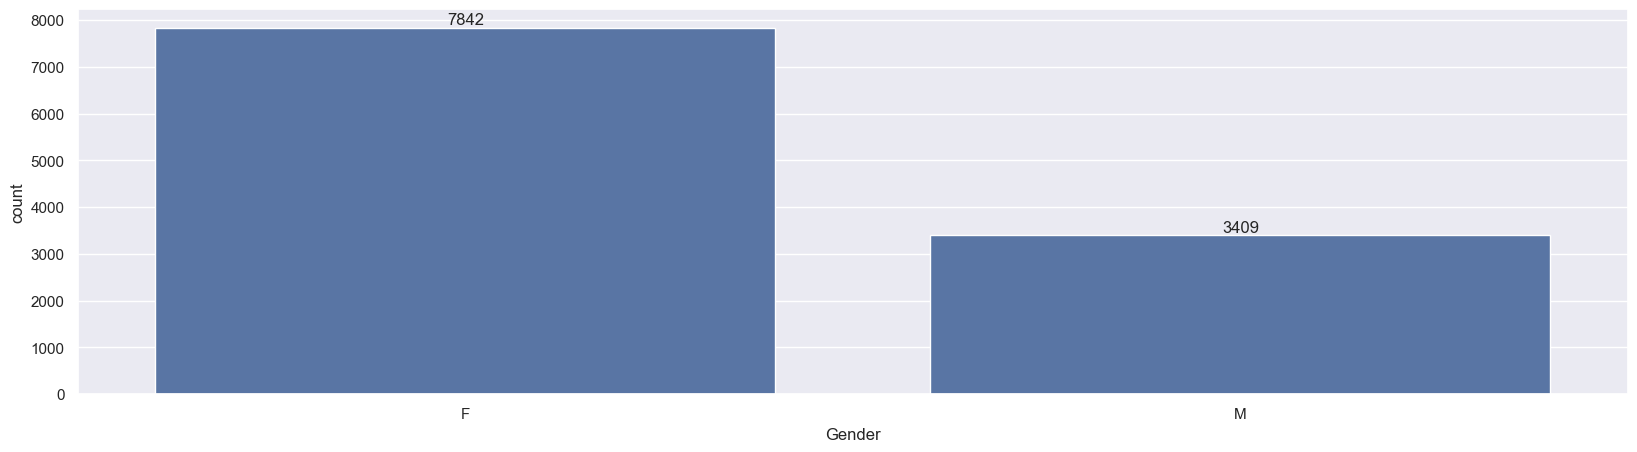

In [137]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [138]:
df.groupby(['Gender'], as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74491401
1,M,31948174


<Axes: xlabel='Gender', ylabel='Amount'>

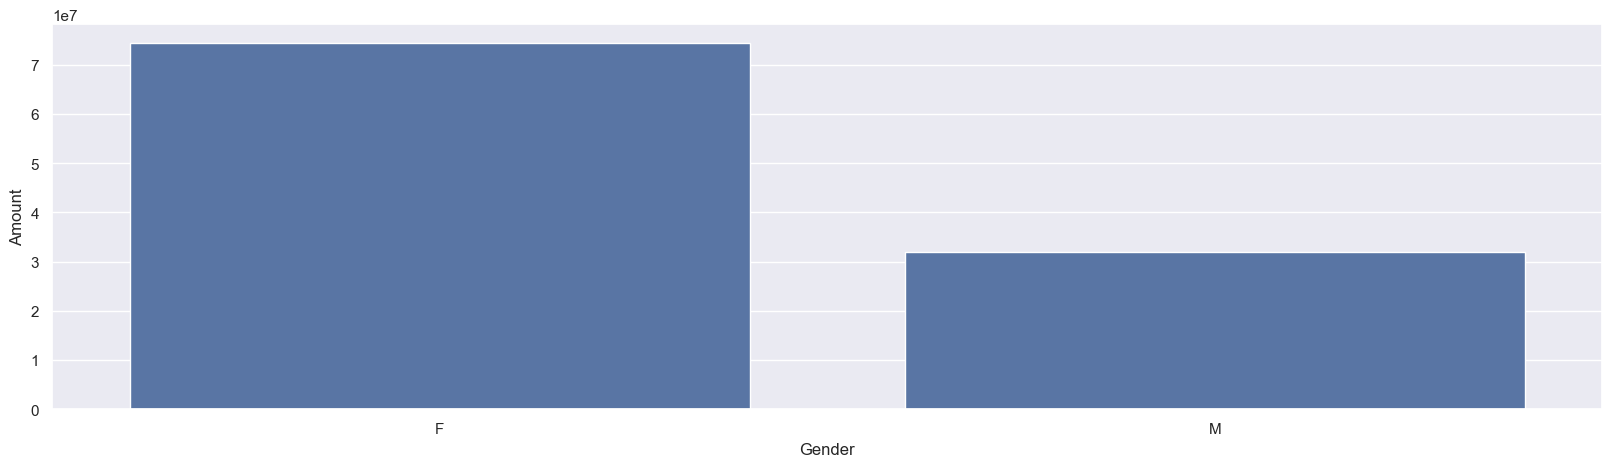

In [139]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

In [140]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

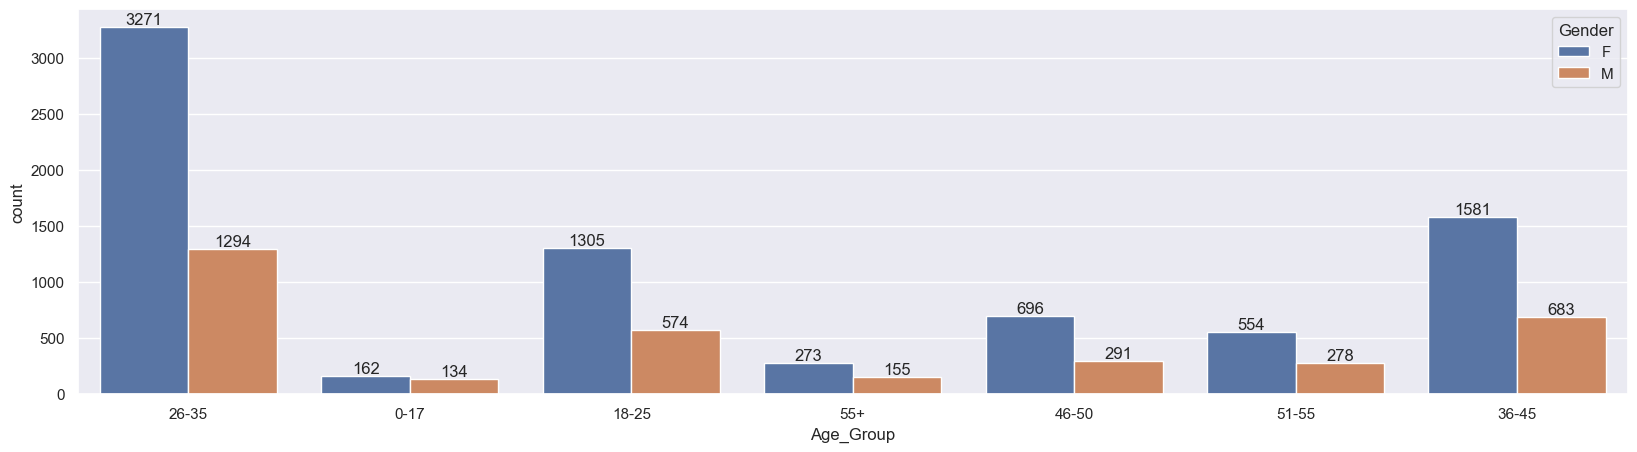

In [141]:
ax = sns.countplot(data = df, x = 'Age_Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

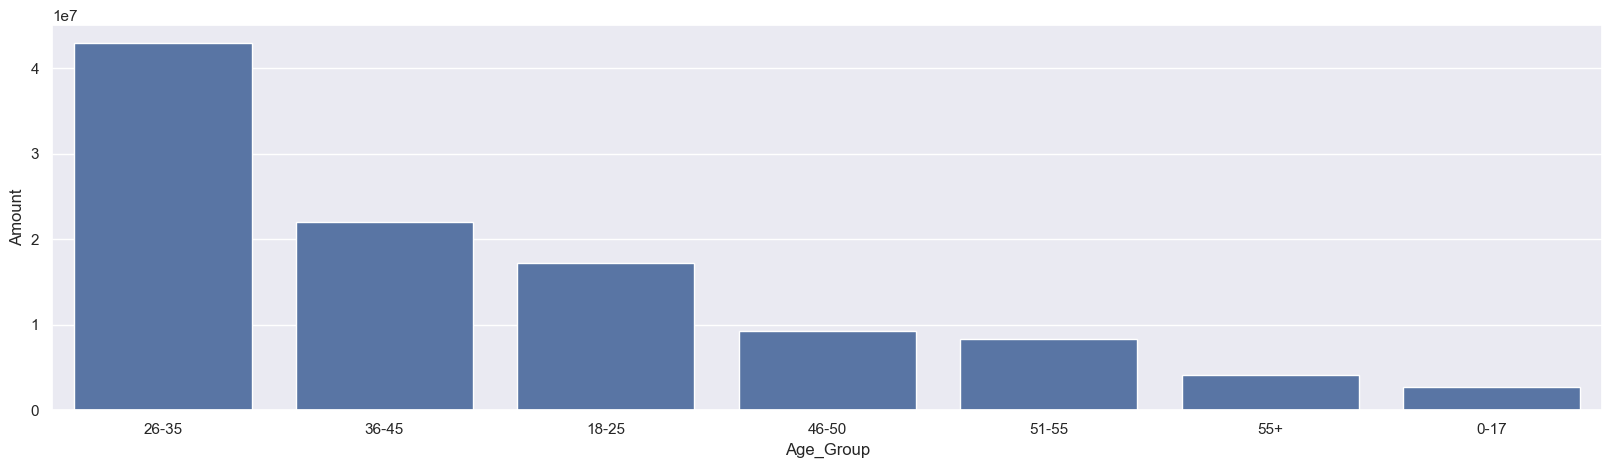

In [142]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age_Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age_Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [143]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

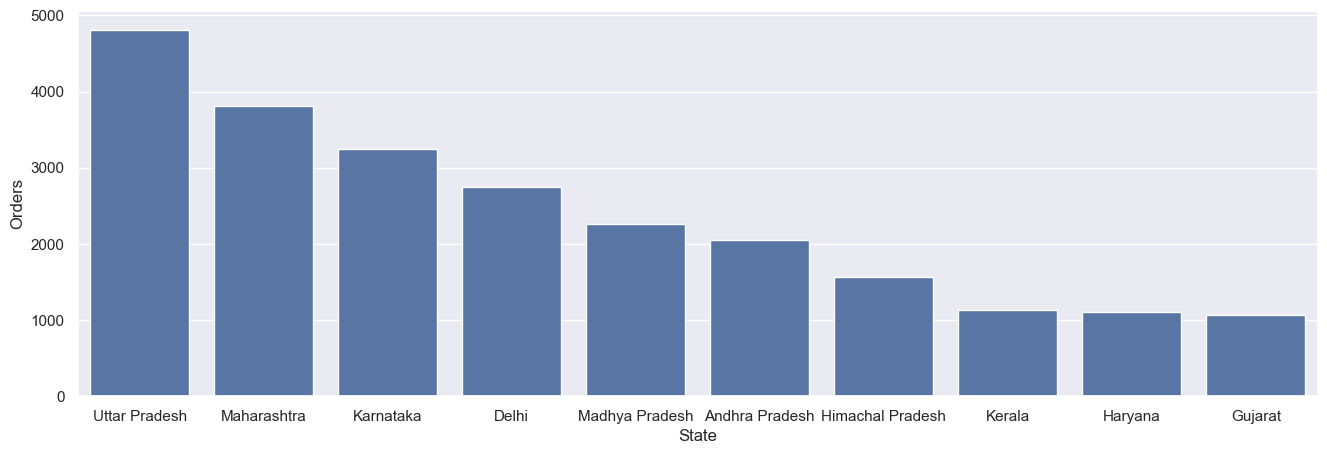

In [144]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

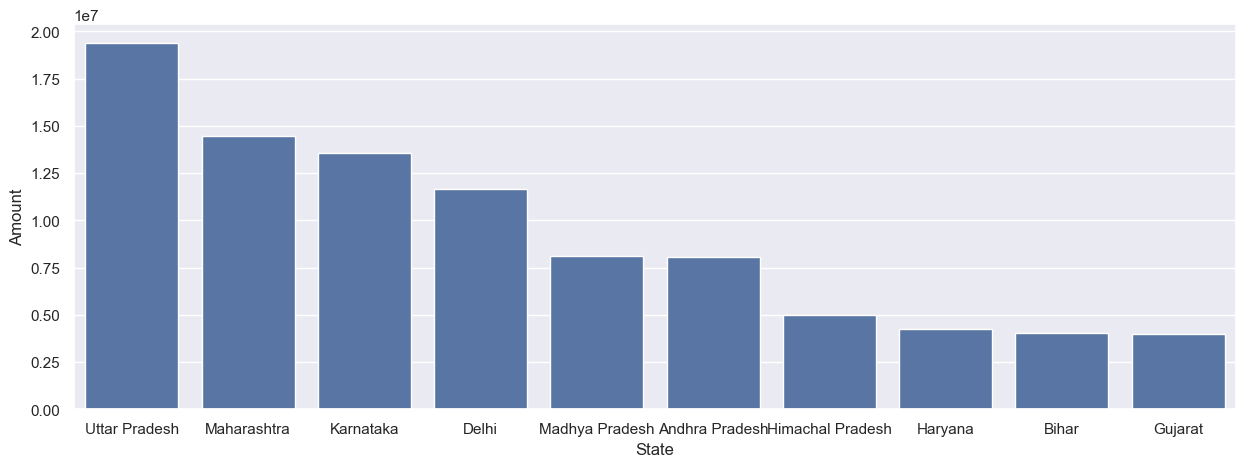

In [145]:
# Total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<Axes: xlabel='State', ylabel='Amount'>

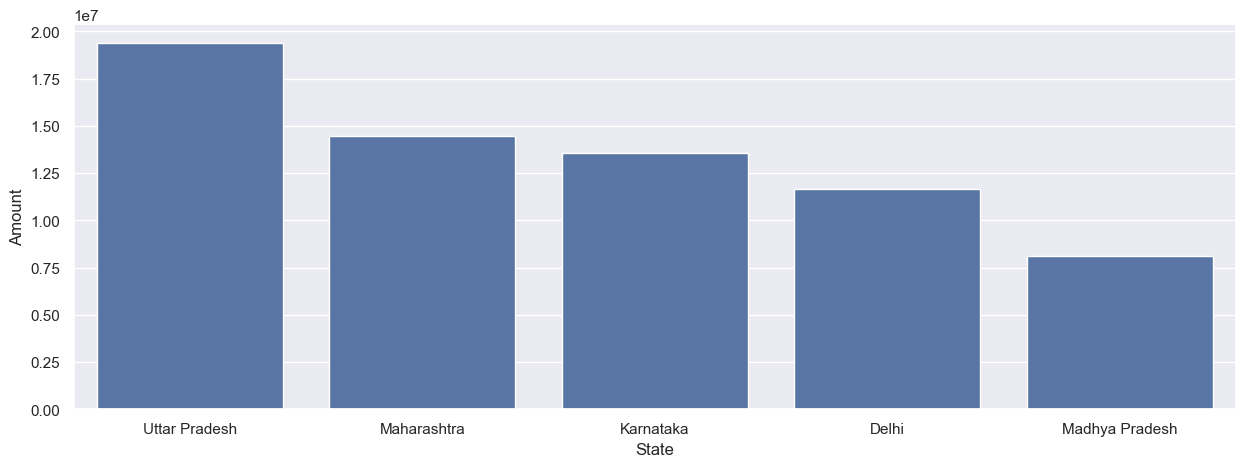

In [146]:
# total amount/sales from top 5 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

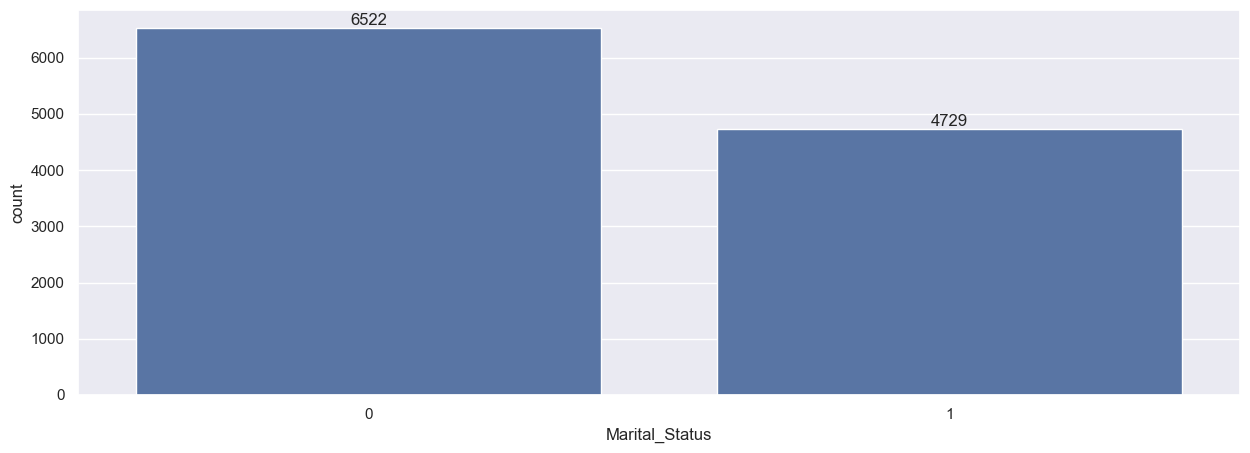

In [147]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

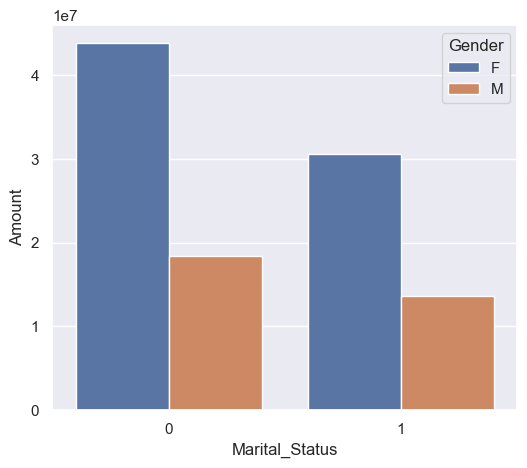

In [148]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From the above graphs we can see that most of the buyers are unmarried (women) and they have high purchasing power*

### Occupation

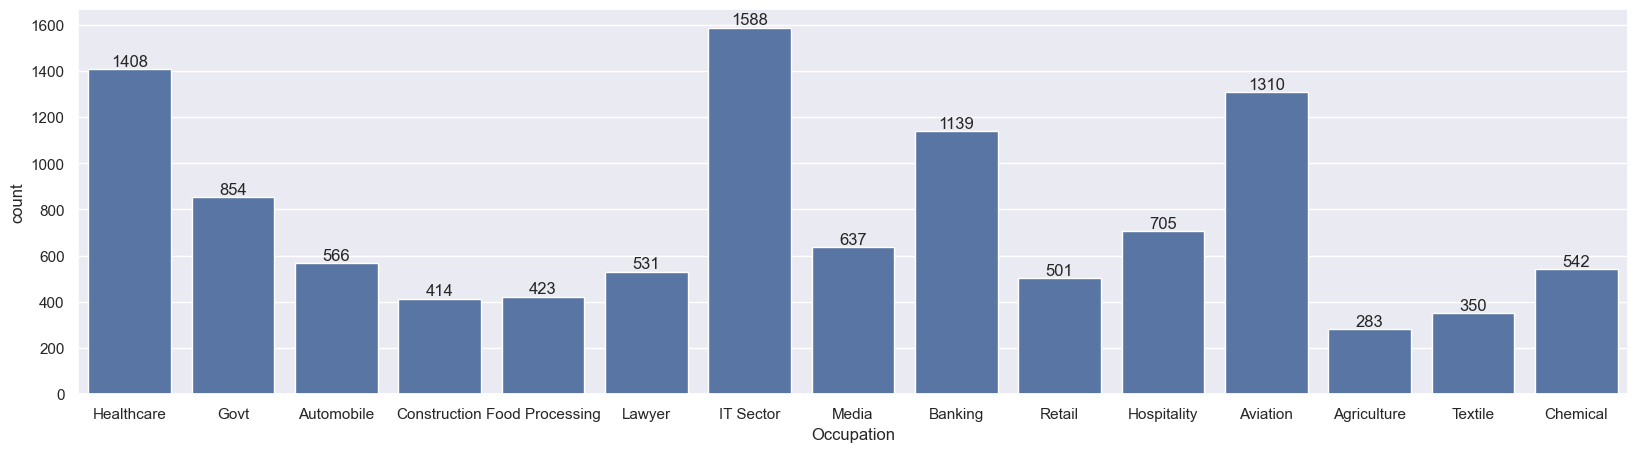

In [149]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

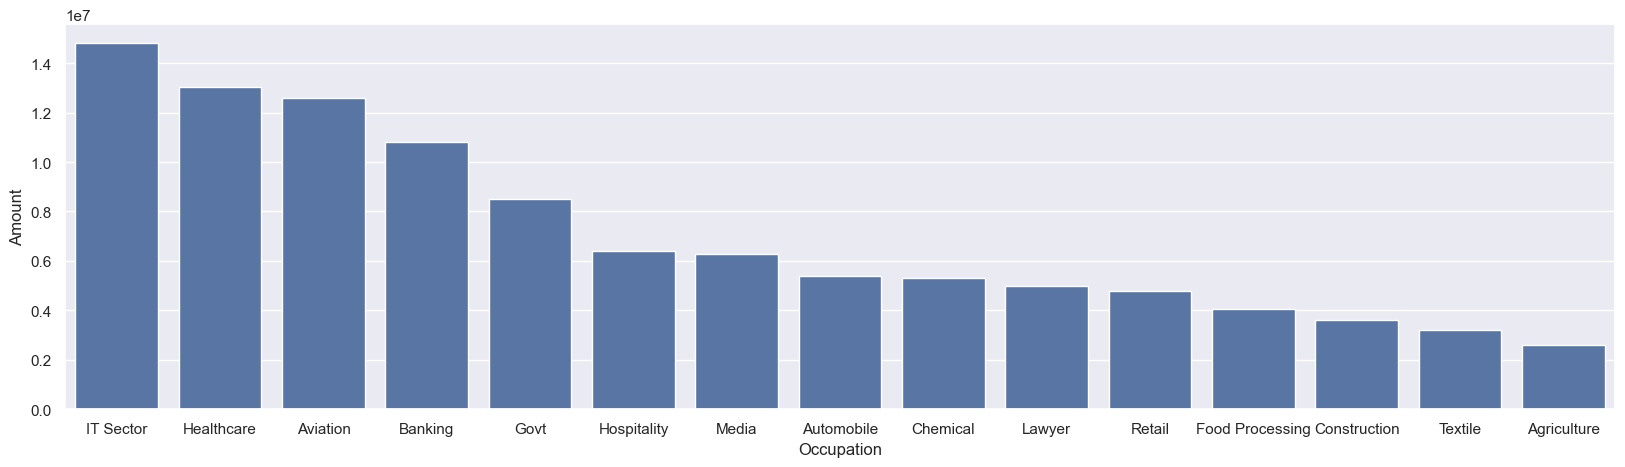

In [150]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

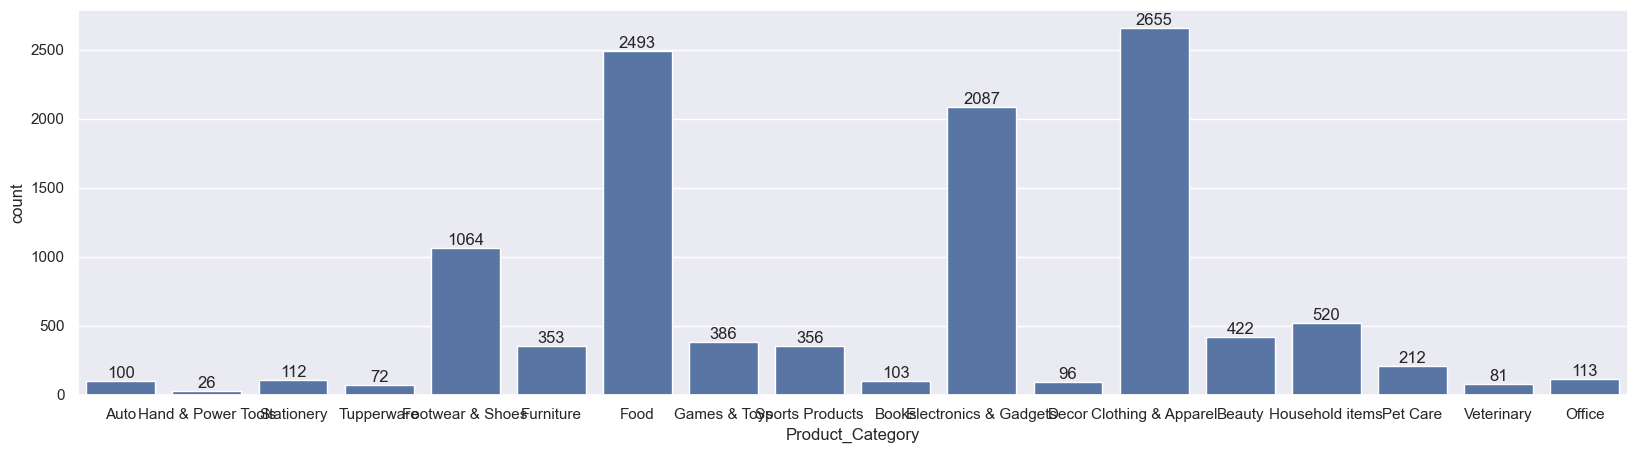

In [151]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

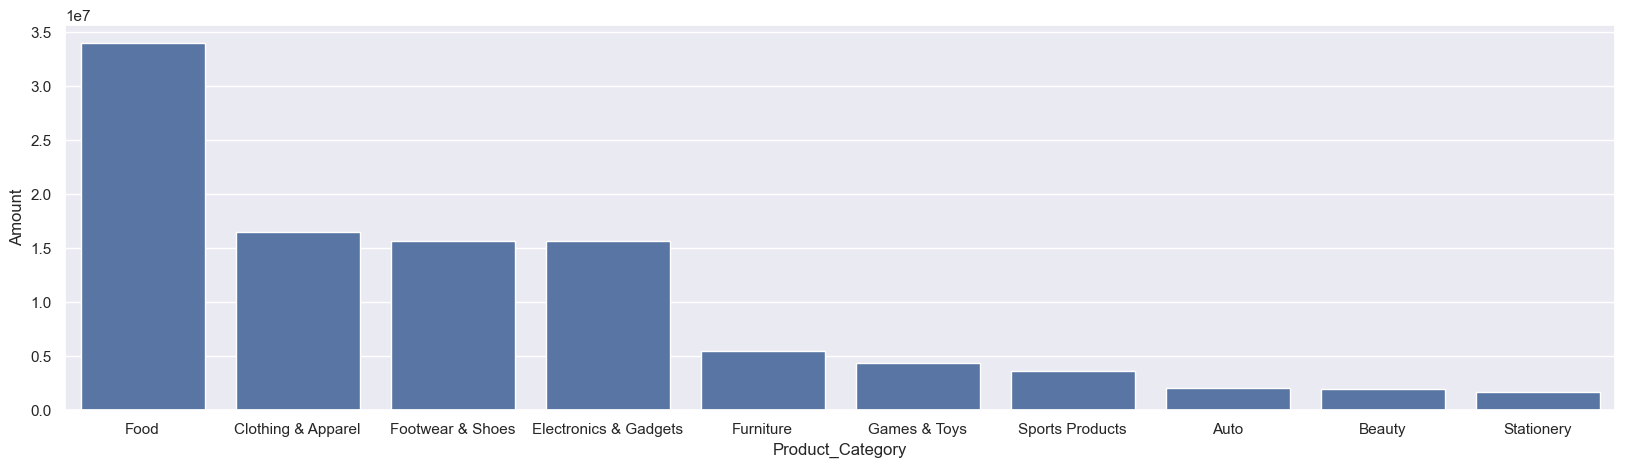

In [152]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

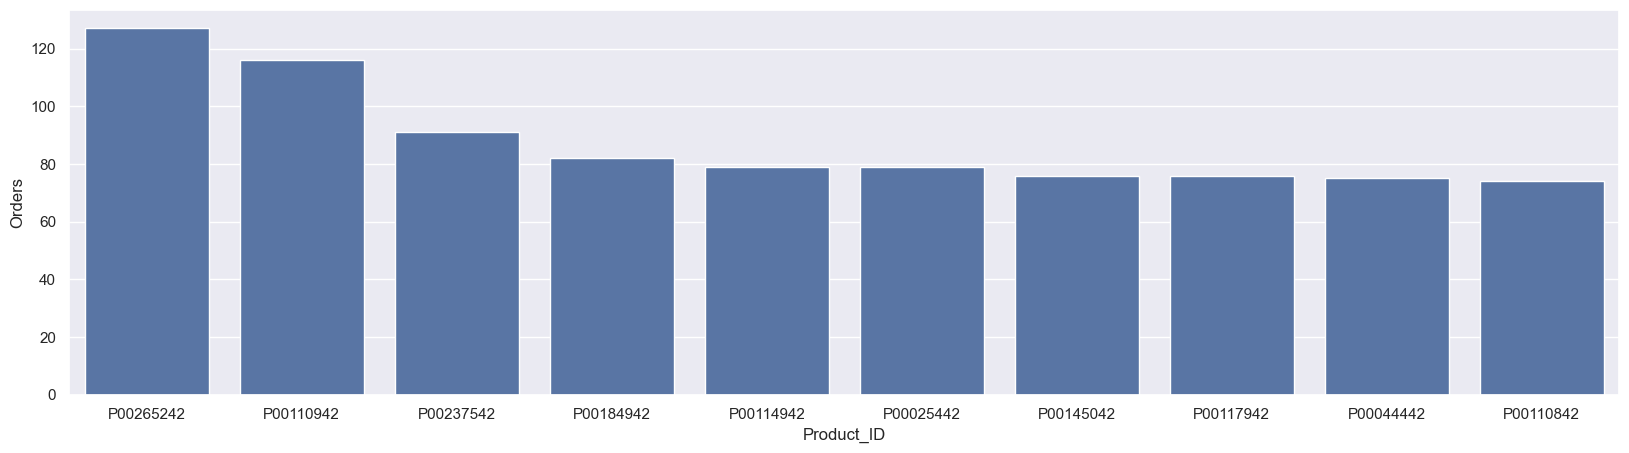

In [153]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

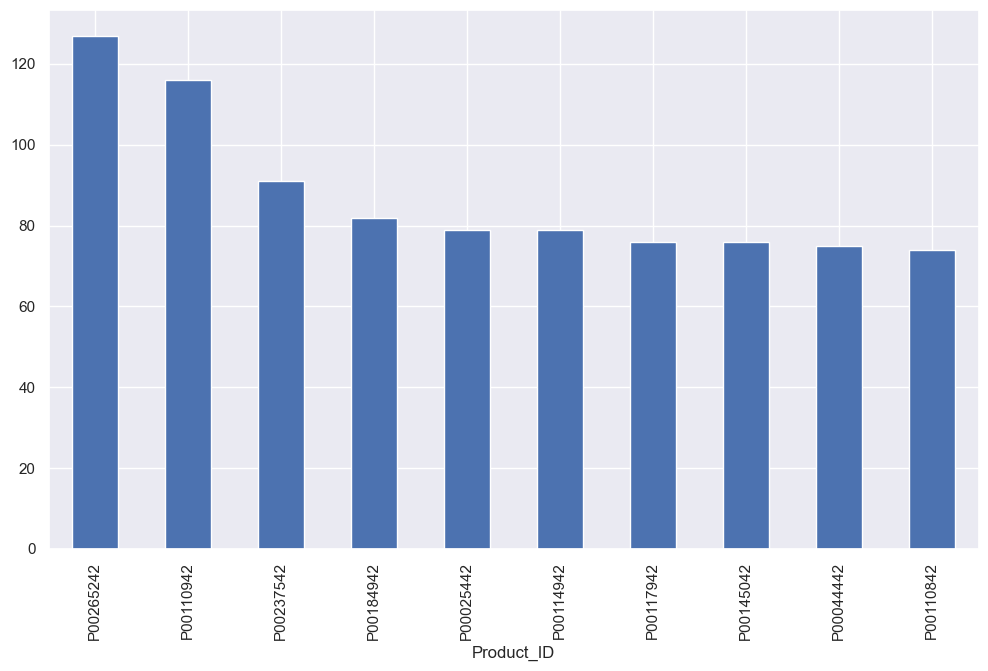

In [154]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Conclusion:
##

- Unmarried women age group 26-35 yrs
- States: UP,  Maharastra, Karnataka
- Working in IT, Healthcare and Aviation
are more likely to buy products from the Food, Clothing, and Electronics categories.